**INTRODUCTION**

The proposal is significant as accurate disease prediction allows for proactive and targeted medical interventions, enhancing treatment effectiveness. Predictive models reduce healthcare burden by enabling early identification of at-risk individuals, facilitating timely interventions and resource allocation. The impact lies in improved screening efficiency, early diagnosis, and optimized healthcare resource utilization. Potential gaps may arise in data quality or model generalization, requiring ongoing refinement to address emerging healthcare challenges and ensure adaptability to new diseases.







In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/corona_tested_006.csv')

<ipython-input-87-0ad2550558d5>:1: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/corona_tested_006.csv')


In [ ]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.shape

(278848, 11)

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
df["Test_date"]=pd.to_datetime(df["Test_date"])

<ipython-input-91-0b5d0bafa63e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Test_date"]=pd.to_datetime(df["Test_date"])


In [ ]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-11-03,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,2020-11-03,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,2020-11-03,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,2020-11-03,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,2020-11-03,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df["month"]=df["Test_date"].dt.month

In [ ]:
df["month"]

0         11
1         11
2         11
3         11
4         11
          ..
278843     4
278844     4
278845     4
278846     4
278847     4
Name: month, Length: 278848, dtype: int64

                     **  DATA** **CLEANING**

Identify and replace "None" values with the mode

In [ ]:
df['Cough_symptoms'].value_counts()

False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64

In [ ]:
df["Cough_symptoms"].replace("None", df["Cough_symptoms"].mode()[0], inplace=True)

In [ ]:
df['Cough_symptoms'].value_counts()

False    127783
FALSE    108837
TRUE      21983
True      20245
Name: Cough_symptoms, dtype: int64

In [ ]:
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'false' if x==False else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Cough_symptoms'].value_counts()

false    236620
true      42228
Name: Cough_symptoms, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

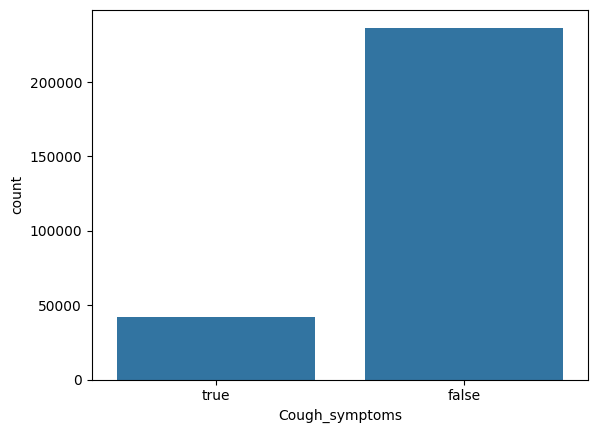

In [ ]:
sns.countplot(x='Cough_symptoms', data=df)
plt.show()

In [ ]:
df['Fever'].value_counts()

False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64

In [ ]:
df["Fever"].replace("None", df["Fever"].mode()[0], inplace=True)

In [ ]:
df['Fever'].value_counts()

False    138026
FALSE    119070
TRUE      11750
True      10002
Name: Fever, dtype: int64

In [ ]:
df['Fever']=df['Fever'].apply(lambda x: 'false' if x==False else x)
df['Fever']=df['Fever'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Fever']=df['Fever'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Fever'].value_counts()

false    257096
true      21752
Name: Fever, dtype: int64

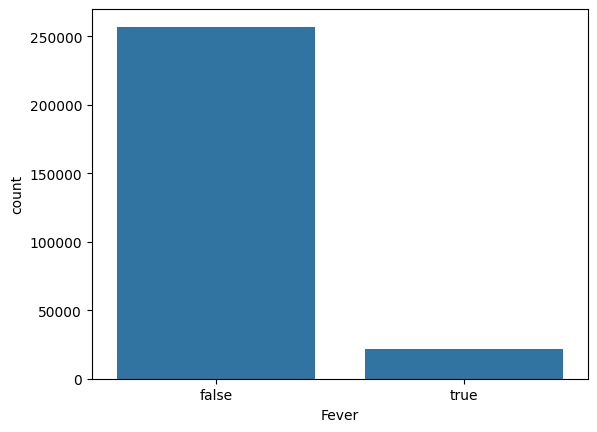

In [ ]:
sns.countplot(x='Fever', data=df)
plt.show()

In [ ]:
df['Sore_throat'].value_counts()

False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64

In [ ]:
df["Sore_throat"].replace("None", df["Sore_throat"].mode()[0], inplace=True)

In [ ]:
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'false' if x==False else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Sore_throat']=df['Sore_throat'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Sore_throat'].value_counts()

false    276922
true       1926
Name: Sore_throat, dtype: int64

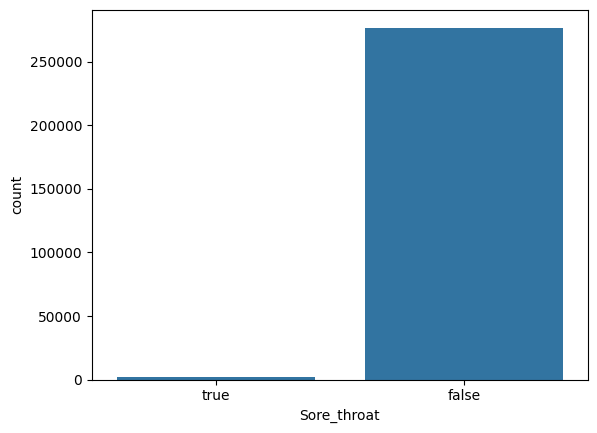

In [ ]:
sns.countplot(x='Sore_throat', data=df)
plt.show()

In [ ]:
df['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

In [ ]:
df["Shortness_of_breath"].replace("None", df["Shortness_of_breath"].mode()[0], inplace=True)

In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'false' if x==False else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Shortness_of_breath'].value_counts()

false    277271
true       1577
Name: Shortness_of_breath, dtype: int64

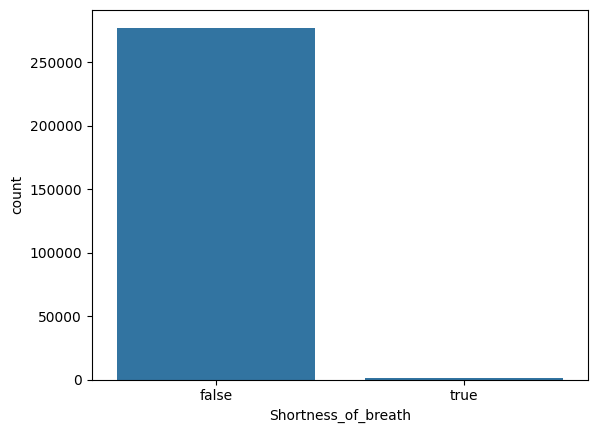

In [ ]:
sns.countplot(x='Shortness_of_breath', data=df)
plt.show()

In [ ]:
df['Headache'].value_counts()

False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64

In [ ]:
df["Headache"].replace("None", df["Headache"].mode()[0], inplace=True)

In [ ]:
df['Headache']=df['Headache'].apply(lambda x: 'false' if x==False else x)
df['Headache']=df['Headache'].apply(lambda x: 'true' if x==True else x)

In [ ]:
df['Headache']=df['Headache'].apply(lambda x: x.lower() if isinstance(x,str) else x)

In [ ]:
df['Headache'].value_counts()

false    276434
true       2414
Name: Headache, dtype: int64

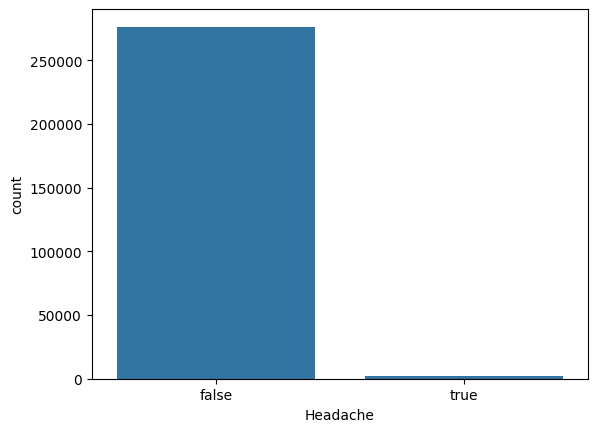

In [ ]:
sns.countplot(x='Headache', data=df)
plt.show()

In [ ]:
df['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [ ]:
df["Corona"].replace("other", df["Corona"].mode()[0], inplace=True)

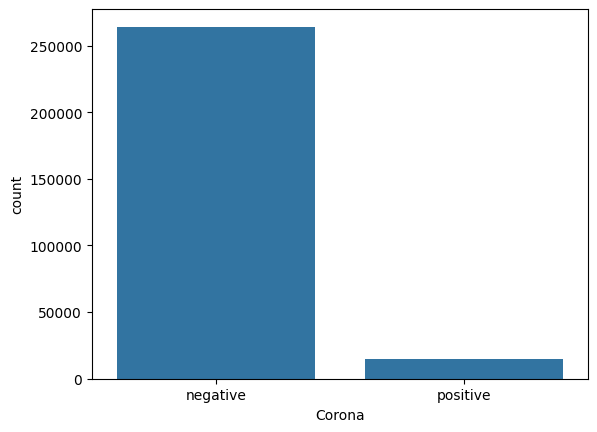

In [ ]:
sns.countplot(x='Corona', data=df)
plt.show()

In [ ]:
df['Age_60_above'].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
# Identify and replace "None" values with the mode
df["Age_60_above"].replace("None", np.nan, inplace=True)
df["Age_60_above"].fillna(df["Age_60_above"].mode()[0], inplace=True)


In [ ]:
df['Age_60_above'].value_counts()

No     253023
Yes     25825
Name: Age_60_above, dtype: int64

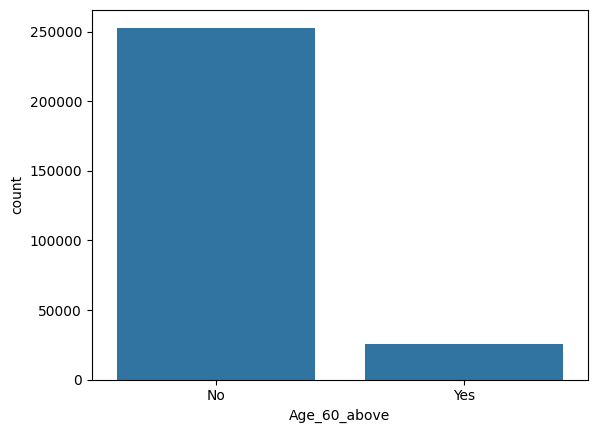

In [ ]:
sns.countplot(x='Age_60_above', data=df)
plt.show()

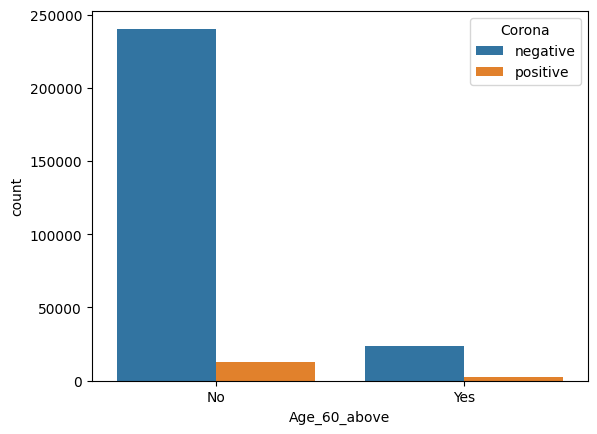

In [ ]:
sns.countplot(x='Age_60_above', hue='Corona', data=df)

# Show the plot
plt.show()

As we seen from the plot most number of positive cases is lies below the age_60 group

# ** HYPOTHESES TESTING **

Here am using Chi-square tests

Chi-square tests are suitable for analyzing the association between categorical variables. It is used when both the predictor and response variables are categorical.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the relevant columns for analysis
selected_columns = ['Fever', 'Corona']

# Create a contingency table
contingency_table = pd.crosstab(df[selected_columns[0]], df[selected_columns[1]])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 19378.570935486066
P-Value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[243515.96003557  13580.03996443]
 [ 20603.03996443   1148.96003557]]


The p-value (0.0) is below most common significance levels (e.g., 0.05), indicating that there is a significant association between having 'Fever' and the 'Corona' status. The degrees of freedom (6) depend on the size of the contingency table. In this context, the small p-value suggests that there is evidence to reject the null hypothesis, and you may conclude that the presence of 'Fever' is associated with the 'Corona' status.






**Encoding**

In [ ]:
df['Cough_symptoms'] = df['Cough_symptoms'].str.strip().str.lower()
df['Cough_symptoms'] = df['Cough_symptoms'].map({'true': 1, 'false': 0})

In [ ]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
0,1,2020-11-03,1,false,true,false,false,negative,No,None,Abroad,11
1,2,2020-11-03,0,true,false,false,false,positive,No,None,Abroad,11
2,3,2020-11-03,0,true,false,false,false,positive,No,None,Abroad,11
3,4,2020-11-03,1,false,false,false,false,negative,No,None,Abroad,11
4,5,2020-11-03,1,false,false,false,false,negative,No,None,Contact with confirmed,11


In [ ]:
df['Fever'] = df['Fever'].str.strip().str.lower()
df['Fever'] = df['Fever'].map({'true': 1, 'false': 0})

In [ ]:
df['Fever'].value_counts()

0    257096
1     21752
Name: Fever, dtype: int64

In [ ]:
df['Sore_throat'] = df['Sore_throat'].str.strip().str.lower()
df['Sore_throat'] = df['Sore_throat'].map({'true': 1, 'false': 0})

In [ ]:
df['Sore_throat'].value_counts()

0    276922
1      1926
Name: Sore_throat, dtype: int64

In [ ]:
df['Shortness_of_breath'] = df['Shortness_of_breath'].str.strip().str.lower()
df['Shortness_of_breath'] = df['Shortness_of_breath'].map({'true': 1, 'false': 0})

In [ ]:
df['Shortness_of_breath'].value_counts()

0    277271
1      1577
Name: Shortness_of_breath, dtype: int64

In [ ]:
df['Headache'] = df['Headache'].str.strip().str.lower()
df['Headache'] = df['Headache'].map({'true': 1, 'false': 0})

In [ ]:
df['Headache'].value_counts()

0    276434
1      2414
Name: Headache, dtype: int64

In [ ]:
df['Corona'] = df['Corona'].map({'positive': 1, 'negative': 0})

In [ ]:
df['Age_60_above'] = df['Age_60_above'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
0,1,2020-11-03,1,0,1,0,0,0,0,None,Abroad,11
1,2,2020-11-03,0,1,0,0,0,1,0,None,Abroad,11
2,3,2020-11-03,0,1,0,0,0,1,0,None,Abroad,11
3,4,2020-11-03,1,0,0,0,0,0,0,None,Abroad,11
4,5,2020-11-03,1,0,0,0,0,0,0,None,Contact with confirmed,11


In [ ]:
df['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [ ]:
df["Sex"].replace("None", df["Sex"].mode()[0], inplace=True)

In [ ]:
df['Sex'].value_counts()

female    149721
male      129127
Name: Sex, dtype: int64

In [ ]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [ ]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
0,1,2020-11-03,1,0,1,0,0,0,0,1,Abroad,11
1,2,2020-11-03,0,1,0,0,0,1,0,1,Abroad,11
2,3,2020-11-03,0,1,0,0,0,1,0,1,Abroad,11
3,4,2020-11-03,1,0,0,0,0,0,0,1,Abroad,11
4,5,2020-11-03,1,0,0,0,0,0,0,1,Contact with confirmed,11


In [ ]:
df['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

**Model Training**

**Splitting the data into x and y**

In [ ]:
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
month                  0
dtype: int64

In [ ]:
def data_split(data, ratio):
    np.random.seed(100)
    shuffled = np.random.permutation(len(data))
    test_data_size = int(len(data)*ratio)
    test_data_indices = shuffled[: test_data_size]
    train_data_indices = shuffled[test_data_size :]
    return data.iloc[test_data_indices], data.iloc[train_data_indices]

In [ ]:
test_data, train_data = data_split(df, 0.20)


In [ ]:
test_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
196158,196159,2020-04-19,1,0,0,0,0,0,0,0,Other,4
262362,262363,2020-04-28,0,0,0,0,0,0,0,1,Other,4
74466,74467,2020-01-04,0,0,0,0,0,0,0,1,Other,1
51832,51833,2020-03-29,0,0,0,0,0,0,1,1,Other,3
274627,274628,2020-04-30,0,0,0,0,0,0,0,1,Other,4
...,...,...,...,...,...,...,...,...,...,...,...,...
98745,98746,2020-05-04,1,0,0,0,0,0,0,1,Abroad,5
266985,266986,2020-04-28,0,0,0,0,0,0,0,1,Other,4
91707,91708,2020-03-04,0,0,0,0,0,0,0,1,Other,3
156970,156971,2020-04-15,0,0,0,0,0,0,0,1,Other,4


In [ ]:
train_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
179174,179175,2020-04-17,0,1,0,0,0,1,0,1,Contact with confirmed,4
277169,277170,2020-04-30,0,0,0,0,0,0,0,0,Other,4
234396,234397,2020-04-23,0,0,0,0,0,0,0,1,Other,4
204737,204738,2020-04-20,0,0,0,0,0,0,0,0,Other,4
12834,12835,2020-03-21,0,0,0,0,0,1,0,1,Contact with confirmed,3
...,...,...,...,...,...,...,...,...,...,...,...,...
212912,212913,2020-04-21,0,0,0,0,0,0,0,0,Other,4
65615,65616,2020-03-31,0,0,0,0,0,0,0,1,Other,3
253799,253800,2020-04-27,0,0,0,0,0,0,0,1,Other,4
210755,210756,2020-04-21,0,0,0,0,0,0,0,0,Other,4


**Inpendent variables** = 'Cough_symptoms''Fever','Sore_throat','Shortness_of_breath','Headache','Age_above_60','Sex'
**Target variable**="Corona"

In [ ]:
x_train = train_data[[	'Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex']].to_numpy()

In [ ]:
x_train

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test = test_data[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex']].to_numpy()

In [ ]:
x_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train = train_data[['Corona']].to_numpy().reshape(223079, )
y_test = test_data[['Corona']].to_numpy().reshape(55769, )

In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

**COMPARATIVE ANALYSIS OF MACHINE LEARNING MODELS**

**LogisticRegression model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(x_train, y_train)

LogisticRegression()

In [ ]:
clf.predict_proba([[ 1, 0, 1, 0, 0,0,0]])

array([[0.40031251, 0.59968749]])

In [ ]:
y_pred = clf.predict_proba(x_test)

In [ ]:
y_pred

array([[0.94156025, 0.05843975],
       [0.97724809, 0.02275191],
       [0.97724809, 0.02275191],
       ...,
       [0.97724809, 0.02275191],
       [0.97724809, 0.02275191],
       [0.97150415, 0.02849585]])

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
log_loss(y_test, y_pred)

0.1611025932733087

A log loss of 0.1611025932733087 is very close to zero, which is generally a good sign in classification problems. Log loss measures the performance of a classification model where the prediction is a probability value between 0 and 1. A lower log loss indicates better performanc

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X_train, X_test, y_train, y_test are your training and testing data
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Assuming you've trained a Decision Tree model (replace this with your actual model)
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred =logistic_model.predict(x_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")##
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[52702   112]
 [ 2304   651]]
Accuracy: 0.9566784414280335
Precision: 0.8532110091743119
Recall: 0.22030456852791877
F1 Score: 0.35018827326519636


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier()

In [ ]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
tree_predictions = tree_model.predict(x_test)

In [ ]:

from sklearn.metrics import accuracy_score

**Gini impurity**

In [ ]:
# Create the model using Gini impurity
tree_model_gini = DecisionTreeClassifier(criterion='gini')

# Train the model
tree_model_gini.fit(x_train, y_train)

# Predictions on the test set
tree_predictions_gini = tree_model_gini.predict(x_test)

# Calculate Gini impurity
gini_impurity = 1 - accuracy_score(y_test, tree_predictions_gini)


In [ ]:
tree_model_gini.predict_proba([[ 1, 0, 1, 0, 0,0,0]])

array([[0.11904762, 0.88095238]])

In [ ]:
y_pred = tree_model_gini.predict_proba(x_test)

In [ ]:
y_pred

array([[0.91684322, 0.08315678],
       [0.97907954, 0.02092046],
       [0.97907954, 0.02092046],
       ...,
       [0.97907954, 0.02092046],
       [0.97907954, 0.02092046],
       [0.97575248, 0.02424752]])

In [ ]:
log_loss(y_test, y_pred)

0.15915314129844266

a log loss value of 0.15915314129844266 is extremely low and close to zero. Log loss is a measure of how well the predicted probabilities match the true probabilities, and a lower log loss indicates better performance.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, X_test, y_train, y_test are your training and testing data
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Assuming you've trained a Decision Tree model (replace this with your actual model)
tree_model_gini = DecisionTreeClassifier()
tree_model_gini.fit(x_train, y_train)

# Make predictions on the test set
y_pred =tree_model_gini.predict(x_test)

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")##
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[52698   116]
 [ 2245   710]]
Accuracy: 0.9576646524054583
Precision: 0.8595641646489104
Recall: 0.24027072758037224
F1 Score: 0.3755620206294631


**Accuracy:**

Accuracy: 95.77%
This metric represents the overall correctness of the model. In your case, the model correctly predicted the class for approximately 95.77% of the instances.
                                                             
**Precision**:

Precision: 85.96%
Precision measures the accuracy of the positive predictions. In your case, when the model predicts the positive class, it is correct about 85.96% of the time.

**Recall (Sensitivity):**

Recall: 24.03%
Recall measures the ability of the model to capture all the relevant instances of the positive class. In your case, the model identified approximately 24.03% of the actual positive instances.

F1 Score:

F1 Score: 37.56%
The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In your case, the F1 Score is 37.56%.

In summary, while the model is accurate overall and has good precision, there is room for improvement in capturing more positive instances (increasing recall). The choice of the appropriate metric depends on the specific goals and requirements of the application.

These metrics provide a comprehensive evaluation of the model's performance. High accuracy and precision indicate that the model is making correct positive predictions, but the relatively low recall suggests that the model may not be capturing all positive cases. Depending on the specific requirements of your problem, you may need to balance these metrics or focus on one over the others.







**SVC**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(x_train, y_train)

SVC()

In [ ]:
svm_predictions = svm_model.predict(x_test)

In [ ]:
y_pred_train = svm_model.decision_function(x_train)

In [ ]:
y_true_train = y_train

In [ ]:
from sklearn.metrics import hinge_loss

In [ ]:

# Calculate hinge loss on the training data
hinge_loss_train = hinge_loss(y_true_train, y_pred_train)

print(f"Hinge Loss on Training Data: {hinge_loss_train}")

Hinge Loss on Training Data: 0.08332002225622663


A hinge loss close to 0 indicates that the model is making accurate predictions on the training data.
A hinge loss closer to 1 suggests that there are more misclassifications or instances that are not correctly classified by the decision function.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

The logistic regression mode and The decision tree models have high accuracy, indicating a good overall performance.

The logistic regression model has a slightly higher recall, meaning it is better at capturing positive instances, though still relatively low.
The decision tree has a slightly higher F1 score, which balances precision and recall.

# **Receiver Operating Characteristic (ROC)  **

The Receiver Operating Characteristic (ROC) curve was generated to assess the performance of our binary classification model comprehensively. By plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold values, the ROC curve provides a visual representation of the trade-off between sensitivity and specificity.

This analysis is crucial as it allows us to understand how well the model distinguishes between positive and negative cases across different decision thresholds. The Area Under the Curve (AUC) of the ROC curve quantifies the model's overall performance, with higher AUC values indicating better discrimination ability.

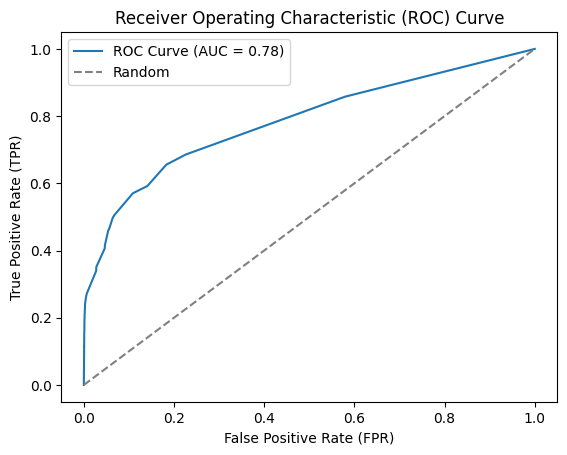

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Insights from ROC

Trade-off between Sensitivity and Specificity:
    The ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate). As the threshold for classification changes, sensitivity and specificity may vary inversely.

Diagnostic Accuracy:
    The curve's shape indicates the model's diagnostic accuracy. A curve that hugs the upper left corner of the plot suggests higher accuracy, as it indicates a higher true positive rate and a lower false positive rate across various threshold values.

AUC Interpretation:
    The Area Under the Curve (AUC) quantifies the model's overall performance. An AUC value closer to 1 indicates better discrimination ability, meaning the model can effectively distinguish between positive and negative cases.

Random Classifier Baseline:
    The dashed diagonal line from (0,0) to (1,1) represents the performance of a random classifier. A good model should have an ROC curve above this line, showing superior performance compared to random guessing.

Model Comparison:
    If comparing multiple models, the ROC curves can help visualize and compare their performances. A model with a curve that lies further towards the upper left corner generally outperforms others.

Threshold Selection:
    ROC curves aid in selecting the optimal classification threshold based on the specific needs of the application. Depending on the cost of f
    alse positives versus false negatives, one can adjust the threshold to achieve the desired balance between sensitivity and specificity.
    
These insights help in evaluating the model's performance comprehensively and guide decision-making regarding its deployment and optimization.









 **SUMMARY**


This project aimed to analyze COVID-19 data using machine learning techniques. The dataset included information such as age, gender, and pre-existing conditions of patients, along with their COVID-19 test results. The primary objectives were to predict the likelihood of positive COVID-19 cases based on demographic and health-related features and to evaluate the model's performance.


**SQL PART**

**Q1**  Find the number of corona patients who faced shortness of breath.

In [ ]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)

In [ ]:
result = conn.execute("""
    SELECT COUNT(*) AS num_patients_with_shortness_of_breath
    FROM df
    WHERE Corona = 1 AND Shortness_of_breath = 1;
""").fetchdf()

print(result)


   num_patients_with_shortness_of_breath
0                                   1164


**Q2**Find the number of negative corona patients who have fever and sore_throat.

In [ ]:
result = conn.execute("""
    SELECT COUNT(*) AS num_negative_patients_with_fever_and_sore_throat
    FROM df
    WHERE Corona = 0
    AND Fever = 1
    AND Sore_throat = 1;
""").fetchdf()

print(result)


   num_negative_patients_with_fever_and_sore_throat
0                                               142


**Q3** Group the data by month and rank the number of positive cases.

In [ ]:
result = conn.execute("""
    SELECT
        month AS month,
        COUNT(*) AS num_positive_cases,
        RANK() OVER (ORDER BY COUNT(*) DESC) AS rank
    FROM df
    WHERE Corona = 1
    GROUP BY month
    ORDER BY month;
""").fetchdf()

print(result)


    month  num_positive_cases  rank
0       1                 682     3
1       2                 615     4
2       3                6283     1
3       4                4188     2
4       5                 505     5
5       6                 394     7
6       7                 483     6
7       8                 274    12
8       9                 288    11
9      10                 356     8
10     11                 331     9
11     12                 330    10


**Q4** Find the female negative corona patients who faced cough and headache.

In [ ]:
result = conn.execute("""
    SELECT COUNT(*) AS num_female_negative_patients_with_cough_and_headache
    FROM df
    WHERE Sex = 1
    AND Corona = 0
    AND Cough_symptoms = 1
    AND Headache = 1;
""").fetchdf()

print(result)


   num_female_negative_patients_with_cough_and_headache
0                                                 69   


**Q5** How many elderly corona patients have faced breathing problems?

In [ ]:
result = conn.execute("""
    SELECT COUNT(*) AS num_elderly_patients_with_breathing_problems
    FROM df
    WHERE Age_60_above = 1
    AND Corona = 1
    AND Breathing_problems = 1;
""").fetchdf()

print(result)


**Q6** Which three symptoms were more common among COVID positive patients?



In [ ]:
result = conn.execute("""
    SELECT
        SUM(Fever) AS num_positive_with_fever,
        SUM(Cough_symptoms) AS num_positive_with_cough,
        SUM(Shortness_of_breath) AS num_positive_with_shortness_of_breath,
        SUM(Headache) AS num_positive_with_headache,
        SUM(Sore_throat) AS num_positive_with_sore_throat
    FROM df
    WHERE Corona = 1;
""").fetchdf()

# Extracting the top three symptoms based on counts
top_three_symptoms = result.iloc[0].nlargest(3).index.tolist()

print("Top three symptoms among COVID positive patients:")
print(top_three_symptoms)


Top three symptoms among COVID positive patients:
['num_positive_with_cough', 'num_positive_with_fever', 'num_positive_with_headache']


**Q7**Which symptom was less common among COVID negative people?

In [ ]:
result = conn.execute("""
    SELECT
        SUM(Fever) AS num_negative_with_fever,
        SUM(Cough_symptoms) AS num_negative_with_cough,
        SUM(Shortness_of_breath) AS num_negative_with_shortness_of_breath,
        SUM(Headache) AS num_negative_with_headache,
        SUM(Sore_throat) AS num_negative_with_sore_throat
    FROM df
    WHERE Corona = 1;
""").fetchdf()

# Extracting the symptom with the lowest count
least_common_symptom = result.iloc[0].nsmallest(1).index.tolist()[0]

print("The symptom less common among COVID negative people:")
print(least_common_symptom)


The symptom less common among COVID negative people:
num_negative_with_shortness_of_breath


**Q8** What are the most common symptoms among COVID positive males whose known contact was abroad?

In [ ]:
result = conn.execute("""
    SELECT
        SUM(Fever) AS num_positive_male_with_fever,
        SUM(Cough_symptoms) AS num_positive_male_with_cough,
        SUM(Shortness_of_breath) AS num_positive_male_with_shortness_of_breath,
        SUM(Headache) AS num_positive_male_with_headache,
        SUM(Sore_throat) AS num_positive_male_with_sore_throat
    FROM df
    WHERE Corona = 1
        AND Sex = 0
        AND Known_contact = 'abroad';
""").fetchdf()

# Extracting the most common symptom
most_common_symptom = result.iloc[0].idxmax()

print("The most common symptom among COVID positive males with known contact abroad:")
print(most_common_symptom)


The most common symptom among COVID positive males with known contact abroad:
nan
